# Circular to Rectangular Transformation

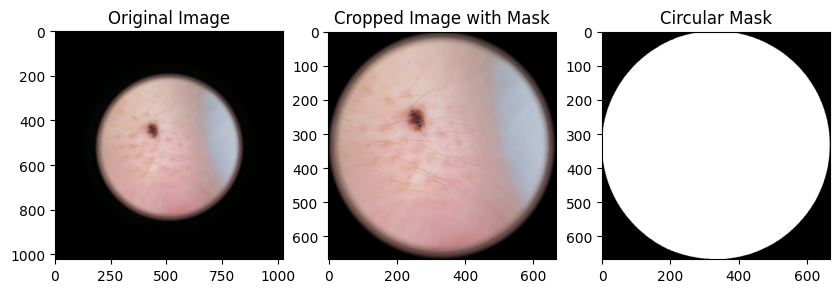

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

TRAIN_PATH = r"C:/Users/User/Desktop/UDG_old_pc/UDG/Subjects/Computer_Aided_Diagnosis/Labs/Datasets/train/train/nevus/nev02029.jpg"

# Load the image
image = cv2.imread(TRAIN_PATH)


# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold to find the circular region
_, mask = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

# Find contours of the thresholded mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

image_with_contours = image.copy()

# Find the largest contour which corresponds to the circular region
largest_contour = max(contours, key=cv2.contourArea)

cv2.drawContours(image_with_contours, [largest_contour], -1, (0, 0, 255), 3)

# Get bounding box around the largest contour
x, y, w, h = cv2.boundingRect(largest_contour)

# Crop the original image using the bounding box
cropped_image = image[y:y+h, x:x+w]


mask_cropped = np.zeros((h, w), dtype=np.uint8)
new_contour = largest_contour - [x, y] 
cv2.drawContours(mask_cropped, [new_contour], -1, 255, thickness=-1)
cropped_circular = cv2.bitwise_and(cropped_image, cropped_image, mask=mask_cropped)

# Display results
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title("Cropped Image with Mask")
plt.imshow(cv2.cvtColor(cropped_circular, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 3)
plt.title("Circular Mask")
plt.imshow(mask_cropped, cmap='gray')

plt.show()


# Filling black regions with mean or median values

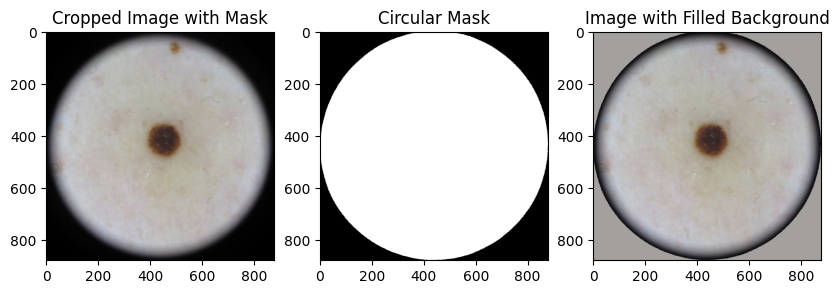

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(TRAIN_PATH)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold to find the circular region
_, mask = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

# Find contours of the thresholded mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the largest contour which corresponds to the circular region
largest_contour = max(contours, key=cv2.contourArea)

# Get bounding box around the largest contour
x, y, w, h = cv2.boundingRect(largest_contour)

# Crop the original image using the bounding box
cropped_image = image[y:y+h, x:x+w]

# Create a circular mask for the cropped region
mask_cropped = np.zeros((h, w), dtype=np.uint8)

# Recalculate the new contour for the cropped area
new_contour = largest_contour - [x, y]  # shift the contour to the cropped image coordinates

# Draw the new contour as a filled white circle on the mask
cv2.drawContours(mask_cropped, [new_contour], -1, 255, thickness=-1)

# Use the mask to extract non-black pixels
non_black_pixels = cropped_image[mask_cropped == 255]

# Compute the median value of non-black pixels
median_val = np.mean(non_black_pixels, axis=0)

# Replace black pixels (mask == 0) with the median value
cropped_filled_image = cropped_image.copy()
cropped_filled_image[mask_cropped == 0] = median_val

# Display the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title("Cropped Image with Mask")
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title("Circular Mask")
plt.imshow(mask_cropped, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Image with Filled Background")
plt.imshow(cv2.cvtColor(cropped_filled_image, cv2.COLOR_BGR2RGB))

plt.show()


Black pixel ratio: 0.0
No significant black regions. Feature extraction on the entire image.


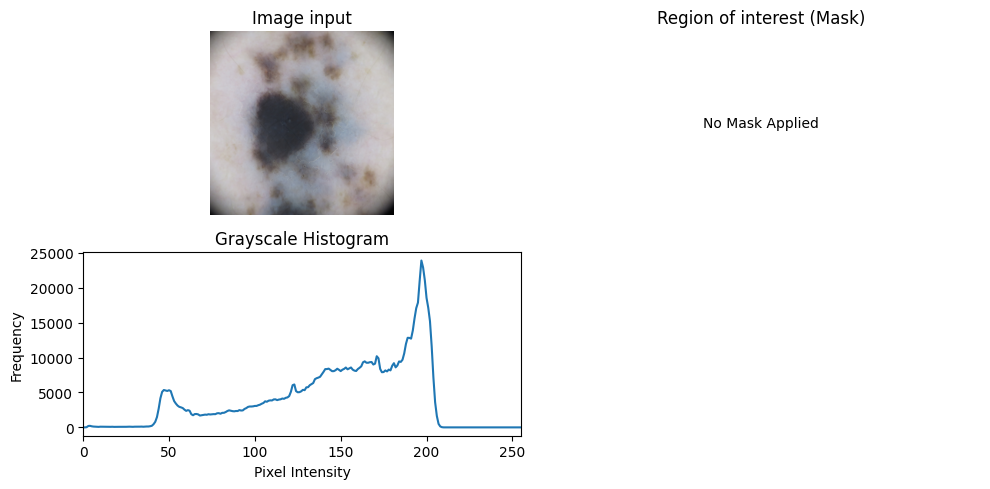

Feature vector (histogram): [0.0000e+00 0.0000e+00 2.6000e+01 2.0000e+02 2.1900e+02 1.5400e+02
 1.1700e+02 1.0200e+02 9.4000e+01 7.3000e+01 9.8000e+01 9.3000e+01
 7.4000e+01 9.0000e+01 8.5000e+01 6.9000e+01 7.9000e+01 8.9000e+01
 7.2000e+01 7.9000e+01 8.4000e+01 8.1000e+01 8.0000e+01 8.9000e+01
 7.8000e+01 8.3000e+01 9.3000e+01 1.0100e+02 8.8000e+01 8.0000e+01
 9.8000e+01 9.7000e+01 8.9000e+01 1.0300e+02 1.1200e+02 9.3000e+01
 1.1500e+02 1.2600e+02 1.2600e+02 1.6300e+02 2.2700e+02 4.5200e+02
 7.9900e+02 1.4830e+03 2.6950e+03 4.1720e+03 5.0830e+03 5.3520e+03
 5.2780e+03 5.2150e+03 5.3190e+03 5.2060e+03 4.4440e+03 3.7650e+03
 3.4080e+03 3.1200e+03 2.9390e+03 2.8650e+03 2.7660e+03 2.5410e+03
 2.3650e+03 2.4690e+03 2.3850e+03 1.8870e+03 1.7390e+03 1.9040e+03
 1.9170e+03 1.8590e+03 1.6940e+03 1.7390e+03 1.7950e+03 1.8270e+03
 1.8070e+03 1.8820e+03 1.8470e+03 1.8680e+03 1.8980e+03 1.8930e+03
 2.0140e+03 2.0360e+03 1.9540e+03 2.0820e+03 2.0860e+03 2.1940e+03
 2.3430e+03 2.4400e+03 2.3780e+03 

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def extract_features(image, threshold = 0.1):
    """
    Function to extract features, focusing only on the non-zero parts if necessary.
    """
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Check for black pixel regions (assume black pixels have value close to 0)
    black_pixels = np.sum(gray == 0)
    total_pixels = gray.size
    black_pixel_ratio = black_pixels / total_pixels
    print(f"Black pixel ratio: {black_pixel_ratio}")

    
    # Threshold to decide if we need to apply a mask (e.g., if 10% or more pixels are black)
    if black_pixel_ratio > threshold:
        # Create a binary mask where non-black regions are 1, and black regions are 0
        _, mask = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

        # Apply the mask and extract features (e.g., histogram) only from the non-black region
        hist = cv2.calcHist([gray], [0], mask, [256], [0, 256])
        print("Mask applied. Feature extraction performed on non-black region.")
    else:
        # No significant black region, extract features from the entire image
        hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
        print("No significant black regions. Feature extraction on the entire image.")
    
    # Plotting the results
    plt.figure(figsize=(10, 5))

    # Input Image
    plt.subplot(2, 2, 1)
    plt.title("Image input")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    # Mask/Region of Interest
    plt.subplot(2, 2, 2)
    plt.title("Region of interest (Mask)")
    if black_pixel_ratio > threshold:
        plt.imshow(mask, cmap='gray')  # Show the mask if applied
    else:
        plt.text(0.5, 0.5, 'No Mask Applied', horizontalalignment='center', verticalalignment='center')
    plt.axis('off')

    # Histogram Plot
    plt.subplot(2, 2, 3)
    plt.title("Grayscale Histogram")
    plt.plot(hist)
    plt.xlim([0, 255])  # Limit x-axis from 0 to 255 (intensity values)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

    return hist

# Example usage
TRAIN_PATH = r"C:/Users/User/Desktop/UDG_old_pc/UDG/Subjects/Computer_Aided_Diagnosis/Labs/Datasets/train/train/nevus/nev01960.jpg"
image = cv2.imread(TRAIN_PATH)  # Update 'path_to_image.jpg' with actual path to your image
features = extract_features(image, threshold = 0.1)

# Print or process the extracted features as needed
print("Feature vector (histogram):", features.flatten())
